In [76]:
from demo  import jdt_db
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import time


# 1.用户加入

### 1.1数据导入

In [77]:
### 本月时间计算
sql_time_min ="'2022-07-01 00:00:00'"
sql_time_max ="'2022-08-01 00:00:00'"
### 上个月时间
sql_old_time_min ="'2022-06-01 00:00:00'"
sql_old_time_max ="'2022-07-01 00:00:00'"
### 去年月时间
sql_old_time_min_1 ="'2021-07-01 00:00:00'"
sql_old_time_max_1 ="'2021-08-01 00:00:00'"
### 前个月时间
sql_old_time_min_2 ="'2022-05-01 00:00:00'"
sql_old_time_max_2 ="'2022-06-01 00:00:00'"
# 时间戳
list_time1 = 1654012800
list_time2 = 1656604800
list_time3 = 1659283200
# 90天时间
day_90_sql_time_1= "'2022-05-01 00:00:00'"
day_90_sql_time_2= "'2022-04-01 00:00:00'"


In [78]:
user_join_sql_1 = "SELECT id,nickname,user_from,user_province,province_id,p_name,	FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' )  as '时间',age,gender,group_id  FROM jdt_user  WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >=  " + sql_time_min + "AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_time_max
print(user_join_sql_1)
print('--' * 20)
user_join_sql_2 = "SELECT id,nickname,user_from,user_province,province_id,p_name,	FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' )  as '时间',age,gender,group_id  FROM jdt_user  WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >=  " + sql_old_time_min + "AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_old_time_max
print(user_join_sql_2)
print('--' * 20)
user_join_sql_3 = "SELECT id,nickname,user_from,user_province,province_id,p_name,	FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' )  as '时间',age,gender,group_id  FROM jdt_user  WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >=  " + sql_old_time_min_1 + "AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_old_time_max_1
print(user_join_sql_3)
print('--' * 20)
user_join_conference_sql_1 = "SELECT   a.id,   b.conference_id,   b.conference_name,   a.truename,   FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s') as 'jointime',   b.created_at     FROM     jdt_user as a LEFT JOIN jdt_conference_order as b on a.id = b.buyer_id        WHERE    FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')  >= " +  sql_time_min  + "  AND  FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')  < "  +  sql_time_max   + " and order_state in (12,14)   AND b.created_at > FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')   AND b.created_at <  " + sql_time_max + " GROUP BY   a.id  "
print(user_join_conference_sql_1)
print('--' * 20)
user_join_conference_sql_2 = "SELECT   a.id,   b.conference_id,   b.conference_name,   a.truename,   FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s') as 'jointime',   b.created_at     FROM     jdt_user as a LEFT JOIN jdt_conference_order as b on a.id = b.buyer_id        WHERE    FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')  >= " +  sql_old_time_min  + "  AND  FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')  < "  +  sql_old_time_max   + " and order_state in (12,14)   AND b.created_at > FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')   AND b.created_at <  " + sql_old_time_max + " GROUP BY   a.id   "
print(user_join_conference_sql_2)
print('--' * 20)
user_join_conference_sql_3 = "SELECT   a.id,   b.conference_id,   b.conference_name,   a.truename,   FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s') as 'jointime',   b.created_at     FROM     jdt_user as a LEFT JOIN jdt_conference_order as b on a.id = b.buyer_id        WHERE    FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')  >= " +  sql_old_time_min_1  + "  AND  FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')  < "  +  sql_old_time_max_1   + " and order_state in (12,14)   AND b.created_at > FROM_UNIXTIME(a.jointime,'%Y-%m-%d %H:%m:%s')   AND b.created_at <  " + sql_old_time_max_1 + " GROUP BY   a.id   "
print(user_join_conference_sql_3)
print('--' * 20)
user_join_up_sql_1 = "  SELECT   a.id,  a.username,  b.created_at,  b.user_group,  b.user_upgrade_group  FROM  jdt_user AS a  LEFT JOIN jdt_user_upgrade_log AS b ON a.id = b.user_id   WHERE  FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' ) >= " +  sql_time_min  + "  AND FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' ) < "  +  sql_time_max   + "  AND b.created_at > FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' )   AND b.created_at < " + sql_time_max + "  GROUP BY  a.id,  b.conference_id"
print(user_join_up_sql_1)
print('--' * 20)
user_join_up_sql_2 = "  SELECT   a.id,  a.username,  b.created_at,  b.user_group,  b.user_upgrade_group  FROM  jdt_user AS a  LEFT JOIN jdt_user_upgrade_log AS b ON a.id = b.user_id   WHERE  FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' ) >= " +  sql_old_time_min  + "  AND FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' ) < "  +  sql_old_time_max   + "  AND b.created_at > FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' )   AND b.created_at < " + sql_old_time_max + "  GROUP BY  a.id,  b.conference_id"
print(user_join_up_sql_2)
print('--' * 20)
user_join_up_sql_3 = "  SELECT   a.id,  a.username,  b.created_at,  b.user_group,  b.user_upgrade_group  FROM  jdt_user AS a  LEFT JOIN jdt_user_upgrade_log AS b ON a.id = b.user_id   WHERE  FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' ) >= " +  sql_old_time_min_1  + "  AND FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' ) < "  +  sql_old_time_max_1   + "  AND b.created_at > FROM_UNIXTIME( a.jointime, '%Y-%m-%d %H:%m:%s' )   AND b.created_at < " + sql_old_time_max_1 + "  GROUP BY  a.id,  b.conference_id"
print(user_join_up_sql_3)
print('--' * 20)

# 用户注册数据
input_user_join_data_1 = jdt_db(user_join_sql_1)
input_user_join_data_2 = jdt_db(user_join_sql_2)
input_user_join_data_3 = jdt_db(user_join_sql_3)

SELECT id,nickname,user_from,user_province,province_id,p_name,	FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' )  as '时间',age,gender,group_id  FROM jdt_user  WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >=  '2022-07-01 00:00:00'AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < '2022-08-01 00:00:00'
----------------------------------------
SELECT id,nickname,user_from,user_province,province_id,p_name,	FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' )  as '时间',age,gender,group_id  FROM jdt_user  WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >=  '2022-06-01 00:00:00'AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < '2022-07-01 00:00:00'
----------------------------------------
SELECT id,nickname,user_from,user_province,province_id,p_name,	FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' )  as '时间',age,gender,group_id  FROM jdt_user  WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >=  '2021-07-01 00:00:00'AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < '2021-08-01 00:0

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


5.348250389099121


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


4.872620344161987


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


4.260400295257568


In [79]:
input_user_join_data_1

,id,nickname,user_from,user_province,province_id,p_name,时间,age,gender,group_id
0,2140809,17335598383,0,None,NaN,王红勤,2022-07-01 00:04:08,0,0,1
1,2140810,13533430764,0,None,NaN,沈妃英,2022-07-01 00:04:13,0,0,1
2,2140811,15240671313,0,广西壮族自治区,2162.0,15278201468,2022-07-01 00:12:57,36,2,2
3,2140812,15579890870,0,None,NaN,张春兰,2022-07-01 00:19:42,0,0,1
4,2140813,17777981188,0,None,2162.0,13504026598荣,2022-07-01 00:52:59,0,2,2
...,...,...,...,...,...,...,...,...,...,...
48747,2189582,15030449043,0,None,NaN,高庆梅,2022-07-25 11:22:53,0,0,1
48748,2189583,15558186202,0,None,NaN,吕梅春,2022-07-25 11:23:09,0,0,1
48749,2189584,13755417914,0,None,NaN,巫琼,2022-07-25 11:23:10,0,0,1
48750,2189585,13726284100,0,None,NaN,李欣蓉,2022-07-25 11:23:11,0,0,1


In [80]:
# 新用户参加会务
user_join_conference_1 = jdt_db(user_join_conference_sql_1)
user_join_conference_2 = jdt_db(user_join_conference_sql_2)
user_join_conference_3 = jdt_db(user_join_conference_sql_3)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


29.866697311401367


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


27.715869665145874


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


10.962917804718018


In [81]:
user_join_conference_1

,id,conference_id,conference_name,truename,jointime,created_at
0,2140863,121985,膝关节问题(陈翠花),夏秀清,2022-07-01 08:07:29,2022-07-01 08:32:33
1,2140977,121978,江西南昌线下体验式沙龙(刘清秀),任玲,2022-07-01 09:07:08,2022-07-01 09:54:19
2,2140995,121990,颈肩问题调理和保养(吕世龙),刘清玉,2022-07-01 10:07:02,2022-07-01 10:09:16
3,2141006,121878,杜佰丽~膝关节自测调理方法(杜佰丽),13772305899,2022-07-01 10:07:29,2022-07-01 10:26:40
4,2141017,121878,杜佰丽~膝关节自测调理方法(杜佰丽),13772906189,2022-07-01 10:07:56,2022-07-01 10:30:04
...,...,...,...,...,...,...
16404,2189580,123012,女性经络逆龄养生驻颜术2,13946310090,2022-07-25 11:07:35,2022-07-25 11:22:51
16405,2189579,123012,女性经络逆龄养生驻颜术2,13485350820,2022-07-25 11:07:34,2022-07-25 11:22:59
16406,2189526,123012,女性经络逆龄养生驻颜术2,19101726686,2022-07-25 11:07:58,2022-07-25 11:23:09
16407,2189583,123012,女性经络逆龄养生驻颜术2,15558186202,2022-07-25 11:07:09,2022-07-25 11:23:26


In [82]:
# 本月新用户升级人数
user_join_up_1= jdt_db(user_join_up_sql_1)
user_join_up_2= jdt_db(user_join_up_sql_2)
user_join_up_3= jdt_db(user_join_up_sql_3)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


1.3422305583953857


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


1.6281630992889404


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


1.018883228302002


In [83]:
user_join_up_1

,id,username,created_at,user_group,user_upgrade_group
0,2140863,15102157659,2022-07-01 08:38:24,1,2
1,2140891,13092072013,2022-07-01 08:56:34,1,2
2,2140921,13968758512,2022-07-01 09:13:19,1,2
3,2140995,15622580563,2022-07-01 10:11:39,1,2
4,2141007,18641353136,2022-07-01 10:34:28,1,2
...,...,...,...,...,...
2942,2188604,15077286488,2022-07-25 10:49:11,1,2
2943,2189341,15157962258,2022-07-25 10:51:39,1,2
2944,2189255,17373996353,2022-07-25 10:57:30,1,2
2945,2155780,15517668884,2022-07-25 11:04:29,1,2


### 1.2用户注册方式

In [84]:
input_user_join_data_1['time'] = pd.to_datetime(input_user_join_data_1['时间'],format='%Y-%m-%d').dt.day
input_user_join_data_1['用户注册方式'] = np.where(input_user_join_data_1['p_name']=='官方直播中心','自绑定','被邀请')

input_user_join_data_2['time'] = pd.to_datetime(input_user_join_data_2['时间'],format='%Y-%m-%d').dt.day
input_user_join_data_2['用户注册方式'] = np.where(input_user_join_data_2['p_name']=='官方直播中心','自绑定','被邀请')

In [85]:
input_user_join_data_1.to_csv(r'D:\Work\data\2022.06.17六月份数据分析报告\1.1本月新增用户数据.csv')
input_user_join_data_2.to_csv(r'D:\Work\data\2022.06.17六月份数据分析报告\1.2上月新增用户数据.csv')

In [86]:
joinuser_1 = input_user_join_data_1
joinuser_2 = input_user_join_data_2
joinuser_3 = input_user_join_data_3

In [87]:
zibangding_1 = joinuser_1[joinuser_1['用户注册方式'] == '自绑定']['id'].count()
beiyaoqing_1 = joinuser_1[joinuser_1['用户注册方式'] == '被邀请']['id'].count()
zibangding_2 = joinuser_2[joinuser_2['用户注册方式'] == '自绑定']['id'].count()
beiyaoqing_2 = joinuser_2[joinuser_2['用户注册方式'] == '被邀请']['id'].count()

a = zibangding_1/joinuser_1['id'].count()
b = beiyaoqing_1/joinuser_1['id'].count()

c = zibangding_2/joinuser_2['id'].count()
d = beiyaoqing_2/joinuser_2['id'].count()


print('本月自绑定用户数量  ' + str(zibangding_1))
print('本月被邀请用户数量  ' + str(beiyaoqing_1))

print('上月自绑定用户数量  ' + str(zibangding_2))
print('上月被邀请用户数量  ' + str(beiyaoqing_2))

print('本月自绑定占比  ' + str(a/(a + b)))
print('本月被邀请占比  ' + str(b/(a + b)))

print('上月自绑定占比  ' + str(c/(c + d)))
print('上月被邀请占比  ' + str(d/(c + d)))

print('自绑定环比上个月百分点 '+ str(a-c))
print('被邀请环比上个月百分点 '+ str(b-d))


本月自绑定用户数量  950
本月被邀请用户数量  47802
上月自绑定用户数量  1211
上月被邀请用户数量  39352
本月自绑定占比  0.019486380045946834
本月被邀请占比  0.9805136199540532
上月自绑定占比  0.029854793777580553
上月被邀请占比  0.9701452062224194
自绑定环比上个月百分点 -0.010368413731633719
被邀请环比上个月百分点 0.010368413731633774


### 1.3用户新增数据详情

In [88]:
newuserjoin_1 = joinuser_1['id'].count()
newuserjoin_2 = joinuser_2['id'].count()
newuserjoin_3 = joinuser_3['id'].count()
newuserjoin_than_H = (joinuser_1['id'].count() - joinuser_2['id'].count()) / joinuser_2['id'].count()
newuserjoin_than_T = (joinuser_1['id'].count() - joinuser_3['id'].count()) / joinuser_3['id'].count()

In [89]:
print('本月用户新增人数：' + str(newuserjoin_1))
print('上月用户新增人数：' + str(newuserjoin_2))
print('去年用户新增人数：' + str(newuserjoin_3))
print('用户新增人数环比：' + str(newuserjoin_than_H))
print('用户新增人数同比：' + str(newuserjoin_than_T))

本月用户新增人数：48752
上月用户新增人数：40563
去年用户新增人数：23935
用户新增人数环比：0.20188348987993984
用户新增人数同比：1.0368498015458534


### 1.4新用户参会数据详情


In [90]:
user_join_conference_1['jointime'] = pd.to_datetime(user_join_conference_1['jointime'])
user_join_conference_1['distance_time'] = (user_join_conference_1['created_at'] - user_join_conference_1['jointime']).dt.seconds / 60
user_join_conference_1.head()
user_join_conference_2['jointime'] = pd.to_datetime(user_join_conference_2['jointime'])
user_join_conference_2['distance_time'] = (user_join_conference_2['created_at'] - user_join_conference_2['jointime']).dt.seconds / 60


In [91]:
user_join_conference_1

,id,conference_id,conference_name,truename,jointime,created_at,distance_time
0,2140863,121985,膝关节问题(陈翠花),夏秀清,2022-07-01 08:07:29,2022-07-01 08:32:33,25.066667
1,2140977,121978,江西南昌线下体验式沙龙(刘清秀),任玲,2022-07-01 09:07:08,2022-07-01 09:54:19,47.183333
2,2140995,121990,颈肩问题调理和保养(吕世龙),刘清玉,2022-07-01 10:07:02,2022-07-01 10:09:16,2.233333
3,2141006,121878,杜佰丽~膝关节自测调理方法(杜佰丽),13772305899,2022-07-01 10:07:29,2022-07-01 10:26:40,19.183333
4,2141017,121878,杜佰丽~膝关节自测调理方法(杜佰丽),13772906189,2022-07-01 10:07:56,2022-07-01 10:30:04,22.133333
...,...,...,...,...,...,...,...
16404,2189580,123012,女性经络逆龄养生驻颜术2,13946310090,2022-07-25 11:07:35,2022-07-25 11:22:51,15.266667
16405,2189579,123012,女性经络逆龄养生驻颜术2,13485350820,2022-07-25 11:07:34,2022-07-25 11:22:59,15.416667
16406,2189526,123012,女性经络逆龄养生驻颜术2,19101726686,2022-07-25 11:07:58,2022-07-25 11:23:09,15.183333
16407,2189583,123012,女性经络逆龄养生驻颜术2,15558186202,2022-07-25 11:07:09,2022-07-25 11:23:26,16.283333


In [92]:
user_join_conference_1['time'] = pd.to_datetime(user_join_conference_1['created_at'],format='%Y-%m-%d').dt.day
user_join_conference_2['time'] = pd.to_datetime(user_join_conference_2['created_at'],format='%Y-%m-%d').dt.day

In [93]:
newuserconference_1 = user_join_conference_1['id'].count()
newuserconference_2 = user_join_conference_2['id'].count()
newuserconference_3 = user_join_conference_3['id'].count()
newuserconference_than_H = (newuserconference_1-newuserconference_2)/newuserconference_2
newuserconference_than_T = (newuserconference_1-newuserconference_3)/newuserconference_3
newuserconference_rate_1 = user_join_conference_1['id'].count()/joinuser_1['id'].count()
newuserconference_rate_2 = user_join_conference_2['id'].count()/joinuser_2['id'].count()
newuserconference_rate_than_H = (newuserconference_rate_1 - newuserconference_rate_2)/newuserconference_rate_2

In [94]:
print('本月新用户参会人数 ' + str(newuserconference_1))
print('上月新用户参会人数 ' + str(newuserconference_2))
print('去年新用户参会人数 ' + str(newuserconference_3))
print('环比 ' + str(newuserconference_than_H))
print('同比 ' + str(newuserconference_than_T))
print('本月新用户参会率 ' + str(newuserconference_rate_1))
print('上月新用户参会率 ' + str(newuserconference_rate_2))
print('环比新用户参会率 ' + str(newuserconference_rate_than_H))

本月新用户参会人数 16409
上月新用户参会人数 11019
去年新用户参会人数 5120
环比 0.4891550957437154
同比 2.2048828125
本月新用户参会率 0.33658106334099114
上月新用户参会率 0.27165150506619334
环比新用户参会率 0.23901784847087965


<AxesSubplot:xlabel='distance_time', ylabel='id'>

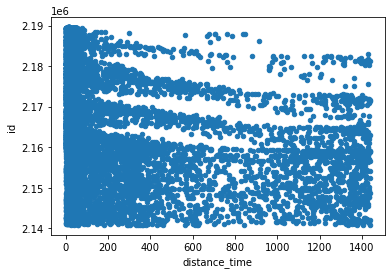

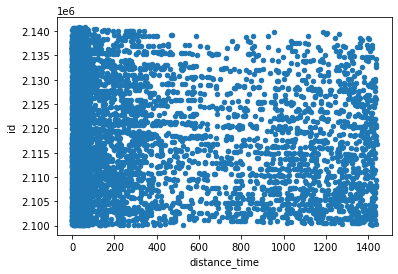

In [95]:
user_join_conference_1.plot.scatter(x = 'distance_time',y = 'id')
user_join_conference_2.plot.scatter(x = 'distance_time',y = 'id')

In [96]:
user_join_conference_dis_1 = user_join_conference_1.drop_duplicates(subset='id',inplace= False,keep = 'first')
user_join_conference_dis_2 = user_join_conference_2.drop_duplicates(subset='id',inplace= False,keep = 'first')


{'whiskers': [<matplotlib.lines.Line2D at 0x23d225c2ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x23d225c2fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23d2a312cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x23d2f67b220>],
 'fliers': [<matplotlib.lines.Line2D at 0x23d2f67b0d0>],
 'means': []}

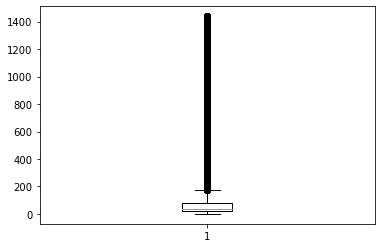

In [97]:
plt.boxplot(user_join_conference_dis_1['distance_time'])

In [98]:
def percentile_conference(data):
    user_join_conference_Q1 = np.percentile(data['distance_time'],25)
    user_join_conference_Q2 = np.percentile(data['distance_time'],50)
    user_join_conference_Q3 = np.percentile(data['distance_time'],75)
    user_join_conference_IQR = user_join_conference_Q3 - user_join_conference_Q1
    user_join_conference_Q0 = user_join_conference_Q1 - 1.5 * user_join_conference_IQR
    user_join_conference_Q4 = user_join_conference_Q3 + 1.5 * user_join_conference_IQR
    print(user_join_conference_Q0)
    print(user_join_conference_Q1)
    print(user_join_conference_Q2)
    print(user_join_conference_Q3)
    print(user_join_conference_Q4)
    print('------------')

In [99]:
percentile_conference(user_join_conference_1)
percentile_conference(user_join_conference_2)

-75.08333333333334
18.866666666666667
37.56666666666667
81.5
175.45
------------
-164.89583333333337
20.316666666666666
41.81666666666667
143.79166666666669
329.0041666666667
------------


### 1.5新用户升学数据详情

In [100]:
user_join_up_1['time'] = pd.to_datetime(user_join_up_1['created_at'],format='%Y-%m-%d').dt.day
user_join_up_2['time'] = pd.to_datetime(user_join_up_2['created_at'],format='%Y-%m-%d').dt.day

In [101]:
newuserup_1 = user_join_up_1['id'].count()
newuserup_2 = user_join_up_2['id'].count()
newuserup_3 = user_join_up_3['id'].count()
newuserup_H = (user_join_up_1['id'].count() - user_join_up_2['id'].count()) /user_join_up_2['id'].count() 
newuserup_T = (user_join_up_1['id'].count() - user_join_up_3['id'].count()) /user_join_up_3['id'].count() 
newuserup_than_1= user_join_up_1['id'].count()/joinuser_1['id'].count()
newuserup_than_2= user_join_up_2['id'].count()/joinuser_2['id'].count()
newuserup_than_H = (newuserup_than_1 - newuserup_than_2) / newuserup_than_2

In [102]:
print('本月新用户升学人数 ' + str(newuserup_1))
print('上月新用户升学人数 ' + str(newuserup_2))
print('去年新用户升学人数 ' + str(newuserup_3))
print('环比 ' + str(newuserup_H))
print('同比 ' + str(newuserup_T))
print('本月新用户升学率 ' + str(newuserup_than_1))
print('上月新用户升学率 ' + str(newuserup_than_2))
print('环比新用户升学率 '  + str(newuserup_than_H))

本月新用户升学人数 2947
上月新用户升学人数 4200
去年新用户升学人数 3897
环比 -0.29833333333333334
同比 -0.24377726456248397
本月新用户升学率 0.06044880210042665
上月新用户升学率 0.10354263737889209
环比新用户升学率 -0.4161941048572366


In [103]:
# joinuser_1['mouth'] = 6
# joinuser_2['mouth'] = 5
# user_join_conference_1['mouth'] = 6
# user_join_conference_2['mouth'] = 5
# user_join_up_1['mouth'] = 6
# user_join_up_2['mouth'] = 5
# joinuser_1_2 = pd.concat([joinuser_1,joinuser_2] , axis= 0 )
# user_join_conference_1_2 = pd.concat([user_join_conference_1,user_join_conference_2] , axis= 0 )
# user_join_up_1_2 = pd.concat([user_join_up_1,user_join_up_2] , axis= 0 )

### 1.6用户每日升级、参会、新增数据

In [104]:
def new_user_data_sum(data2):
    data_list = {}
    for i in range(0,32):
        x = data2[data2['time'] == i]['id'].count()
        data_list[i] = x
    return data_list

In [105]:
input_user_join_data_1_list_data = new_user_data_sum(input_user_join_data_1)
input_user_join_data_1_list_data = pd.DataFrame.from_dict(input_user_join_data_1_list_data, orient='index',columns=['本月新增人数'])
input_user_join_data_2_list_data = new_user_data_sum(input_user_join_data_2)
input_user_join_data_2_list_data = pd.DataFrame.from_dict(input_user_join_data_2_list_data, orient='index',columns=['上月新增人数'])

In [106]:
user_join_conference_1_list_data = new_user_data_sum(user_join_conference_1)
user_join_conference_1_list_data = pd.DataFrame.from_dict(user_join_conference_1_list_data, orient='index',columns=['本月参会人数'])
user_join_conference_2_list_data = new_user_data_sum(user_join_conference_2)
user_join_conference_2_list_data = pd.DataFrame.from_dict(user_join_conference_2_list_data, orient='index',columns=['上月参会人数'])

In [107]:
user_join_up_1_list_data = new_user_data_sum(user_join_up_1)
user_join_up_1_list_data = pd.DataFrame.from_dict(user_join_up_1_list_data, orient='index',columns=['本月升级人数'])
user_join_up_2_list_data = new_user_data_sum(user_join_up_2)
user_join_up_2_list_data = pd.DataFrame.from_dict(user_join_up_2_list_data, orient='index',columns=['上月升级人数'])

In [108]:
print_data = pd.concat([input_user_join_data_1_list_data,input_user_join_data_2_list_data],axis = 1)

In [109]:
print_data = pd.concat([print_data,user_join_conference_1_list_data],axis = 1)
print_data = pd.concat([print_data,user_join_conference_2_list_data],axis = 1)
print_data = pd.concat([print_data,user_join_up_1_list_data],axis = 1)
print_data = pd.concat([print_data,user_join_up_2_list_data],axis = 1)

In [110]:
print_data.to_csv(r'D:\Work\data\2022.06.17六月份数据分析报告\print.csv')

In [111]:
print_data

,本月新增人数,上月新增人数,本月参会人数,上月参会人数,本月升级人数,上月升级人数
0,0,0,0,0,0,0
1,1083,894,76,205,78,56
2,1031,881,112,234,128,86
3,919,691,108,171,129,54
4,933,1055,99,328,96,140
5,873,1029,91,345,110,120
6,771,973,94,320,105,85
7,859,985,76,263,76,91
8,772,1141,84,353,63,147
9,787,1399,140,457,141,203


# 2.用户活跃

### 2.1用户活跃数据导入

In [64]:
# 本月用户活跃次数
user_huoyue_sql_1 = "SELECT	user_id,group_id,	province,	city,	created_at,	updated_at   ,DATE_FORMAT(created_at,'%Y-%m-%d')  as 'time'  FROM	jdt_user_logon_in WHERE  	updated_at >=" + sql_time_min + "  and  updated_at < " + sql_time_max
print(user_huoyue_sql_1)
print('--' * 20)
user_huoyue_sql_2 = "SELECT	user_id,group_id,	province,	city,	created_at,	updated_at   ,DATE_FORMAT(created_at,'%Y-%m-%d')  as 'time'  FROM	jdt_user_logon_in WHERE  	updated_at >=" + sql_old_time_min + "  and  updated_at < " + sql_old_time_max
print(user_huoyue_sql_2)
print('--' * 20)
user_huoyue_sql_3 = "SELECT	user_id,group_id,	province,	city,	created_at,	updated_at   ,DATE_FORMAT(created_at,'%Y-%m-%d')  as 'time'  FROM	jdt_user_logon_in WHERE  	updated_at >=" + sql_old_time_min_1 + "  and  updated_at < " + sql_old_time_max_1
print(user_huoyue_sql_3)
print('--' * 20)
user_old_active_sql_1 = "SELECT    user_id,    group_id,    province,    city,    created_at,    updated_at,    DATE_FORMAT( created_at, '%Y-%m-%d' ) AS 'time'     FROM    jdt_user_logon_in     WHERE    updated_at >= " + sql_time_min    + "   AND updated_at < " + sql_time_max + "      AND user_id NOT IN ( SELECT id FROM jdt_user WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= " + sql_time_min    + "  AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_time_max + ")"
print(user_old_active_sql_1)
print('--' * 20)
user_old_active_sql_2 = "SELECT    user_id,    group_id,    province,    city,    created_at,    updated_at,    DATE_FORMAT( created_at, '%Y-%m-%d' ) AS 'time'     FROM    jdt_user_logon_in     WHERE    updated_at >= " + sql_old_time_min    + "   AND updated_at < " + sql_old_time_max + "      AND user_id NOT IN ( SELECT id FROM jdt_user WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= " + sql_old_time_min    + "  AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_old_time_max + ")"
print(user_old_active_sql_1)
print('--' * 20)
user_old_active_sql_3 = "SELECT    user_id,    group_id,    province,    city,    created_at,    updated_at,    DATE_FORMAT( created_at, '%Y-%m-%d' ) AS 'time'     FROM    jdt_user_logon_in     WHERE    updated_at >= " + sql_old_time_min_1    + "   AND updated_at < " + sql_old_time_max_1 + "      AND user_id NOT IN ( SELECT id FROM jdt_user WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= " + sql_old_time_min_1    + "  AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_old_time_max_1 + ")"
print(user_old_active_sql_3)
print('--' * 20)
user_old_active_sql_4 = "SELECT    user_id,    group_id,    province,    city,    created_at,    updated_at,    DATE_FORMAT( created_at, '%Y-%m-%d' ) AS 'time'     FROM    jdt_user_logon_in     WHERE    updated_at >  " + sql_old_time_min_2    + " AND updated_at < " + sql_old_time_max_2 + "    AND user_id NOT IN ( SELECT id FROM jdt_user WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= " + sql_old_time_min_2   + "  AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) <  " + sql_old_time_max_2 + ")"
print(user_old_active_sql_4)
print('--' * 20)
user_class_count_1 = "    SELECT  group_id  AS 'class', count(id) AS '人数'    FROM (    SELECT a.id, IFNULL(b.group_id, a.group_id) AS group_id, jointime    FROM jdt_user a    LEFT JOIN (    SELECT user_id, min(user_upgrade_group) - 1 AS group_id    FROM jdt_user_upgrade_log    WHERE created_at >= " + sql_time_max    + "      GROUP BY user_id    ) b    ON b.user_id = a.id    ) main    WHERE jointime < UNIX_TIMESTAMP(" + sql_time_max    + "  )    OR jointime IS NULL    GROUP BY group_id"
print(user_class_count_1)
print('--' * 20)
user_class_count_2 = "    SELECT  group_id  AS 'class', count(id) AS '人数'    FROM (    SELECT a.id, IFNULL(b.group_id, a.group_id) AS group_id, jointime    FROM jdt_user a    LEFT JOIN (    SELECT user_id, min(user_upgrade_group) - 1 AS group_id    FROM jdt_user_upgrade_log    WHERE created_at >= " + sql_old_time_max    + "      GROUP BY user_id    ) b    ON b.user_id = a.id    ) main    WHERE jointime < UNIX_TIMESTAMP(" + sql_old_time_max    + "  )    OR jointime IS NULL    GROUP BY group_id"
print(user_class_count_2)
days_90_1 = "   SELECT   	user_id,   	group_id,   	province,   	city,   	created_at,   	updated_at,   	DATE_FORMAT( created_at, '%Y-%m-%d' ) AS 'time'    FROM   	jdt_user_logon_in    WHERE   	updated_at > " + sql_time_min+"  	AND updated_at < " + sql_time_max+" AND user_id NOT IN ( SELECT user_id FROM jdt_user_logon_in WHERE updated_at >" +day_90_sql_time_1 +"   	AND updated_at < " +sql_time_min + " ) AND user_id NOT IN ( SELECT id FROM jdt_user WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= "+day_90_sql_time_1 +"    	AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) <"+ sql_time_max +" )"
print(user_class_count_2)
days_90_2 = "   SELECT   	user_id,   	group_id,   	province,   	city,   	created_at,   	updated_at,   	DATE_FORMAT( created_at, '%Y-%m-%d' ) AS 'time'    FROM   	jdt_user_logon_in    WHERE   	updated_at > " + sql_old_time_min+"  	AND updated_at < " + sql_old_time_max+" AND user_id NOT IN ( SELECT user_id FROM jdt_user_logon_in WHERE updated_at >" +day_90_sql_time_2 +"   	AND updated_at < " +sql_old_time_min + " ) AND user_id NOT IN ( SELECT id FROM jdt_user WHERE FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= "+day_90_sql_time_2 +"    	AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) <"+ sql_old_time_max +" )"
print(user_class_count_2)

SELECT	user_id,group_id,	province,	city,	created_at,	updated_at   ,DATE_FORMAT(created_at,'%Y-%m-%d')  as 'time'  FROM	jdt_user_logon_in WHERE  	updated_at >='2022-07-01 00:00:00'  and  updated_at < '2022-08-01 00:00:00'
----------------------------------------
SELECT	user_id,group_id,	province,	city,	created_at,	updated_at   ,DATE_FORMAT(created_at,'%Y-%m-%d')  as 'time'  FROM	jdt_user_logon_in WHERE  	updated_at >='2022-06-01 00:00:00'  and  updated_at < '2022-07-01 00:00:00'
----------------------------------------
SELECT	user_id,group_id,	province,	city,	created_at,	updated_at   ,DATE_FORMAT(created_at,'%Y-%m-%d')  as 'time'  FROM	jdt_user_logon_in WHERE  	updated_at >='2021-07-01 00:00:00'  and  updated_at < '2021-08-01 00:00:00'
----------------------------------------
SELECT    user_id,    group_id,    province,    city,    created_at,    updated_at,    DATE_FORMAT( created_at, '%Y-%m-%d' ) AS 'time'     FROM    jdt_user_logon_in     WHERE    updated_at >= '2022-07-01 00:00:00' 

In [65]:
user_huoyue_count_1 = jdt_db(user_huoyue_sql_1)
user_huoyue_count_2 = jdt_db(user_huoyue_sql_2)
user_huoyue_count_3 = jdt_db(user_huoyue_sql_3)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


13.786969184875488


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


12.669613599777222


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


5.703915596008301


In [66]:
user_active_repeat_user_1 = jdt_db(user_old_active_sql_1)
user_active_repeat_user_2 = jdt_db(user_old_active_sql_2)
user_active_repeat_user_3 = jdt_db(user_old_active_sql_3)
user_active_repeat_user_4 = jdt_db(user_old_active_sql_4)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


11.198638439178467


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


12.488676071166992


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


8.107033252716064


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


11.278564214706421


In [67]:
user_class_count_1 = jdt_db(user_class_count_1)
user_class_count_2 = jdt_db(user_class_count_2)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


3.6855926513671875


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


3.982471227645874


In [68]:
active_90_1 = jdt_db(days_90_1)
active_90_2 = jdt_db(days_90_2)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


10.72509479522705


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


10.84652304649353


### 2.2月度活跃人数、次数

In [69]:
def active_data(data2):
    data2['des'] = np.where(data2['updated_at']>data2['created_at'],'重复',np.where(data2['updated_at']==data2['created_at'],'新增','错误'))
    data2['time'] = pd.to_datetime(data2['created_at'],format='%Y-%m-%d').dt.date
    return  data2
user_huoyue_count_1 = active_data(user_huoyue_count_1)
user_huoyue_count_2 = active_data(user_huoyue_count_2)
user_huoyue_count_3 = active_data(user_huoyue_count_3)

In [70]:
user_huoyue_count_1

,user_id,group_id,province,city,created_at,updated_at,time,des
0,23472,4,广西壮族自治区,南宁市,2022-07-01 00:01:17,2022-07-01 00:01:17,2022-07-01,新增
1,1739507,3,广东省,广州市,2022-07-01 00:02:17,2022-07-01 00:02:17,2022-07-01,新增
2,2120554,1,广西壮族自治区,,2022-07-01 00:02:28,2022-07-01 00:02:28,2022-07-01,新增
3,2140809,1,河南省,驻马店市,2022-07-01 00:04:08,2022-07-01 00:04:08,2022-07-01,新增
4,2140810,1,广东省,广州市,2022-07-01 00:04:13,2022-07-01 00:04:13,2022-07-01,新增
...,...,...,...,...,...,...,...,...
201480,2189561,1,黑龙江省,,2022-07-25 11:20:22,2022-07-25 11:20:22,2022-07-25,新增
201481,403570,4,河北省,廊坊市,2022-07-25 11:20:23,2022-07-25 11:20:23,2022-07-25,新增
201482,54743,3,四川省,成都市,2022-07-25 11:20:24,2022-07-25 11:20:24,2022-07-25,新增
201483,16137,4,山东省,青岛市,2022-07-25 11:20:25,2022-07-25 11:20:25,2022-07-25,新增


In [71]:
user_huoyue_count_1_2 = pd.concat([user_huoyue_count_1,user_huoyue_count_2],axis = 0)
user_huoyue_count_1_2['mouth'] = pd.to_datetime(user_huoyue_count_1_2['created_at'],format='%Y-%m-%d').dt.month


In [72]:
active_MAU_1 = user_huoyue_count_1.drop_duplicates(subset='user_id',inplace= False)['user_id'].count()
active_MAU_2 = user_huoyue_count_2.drop_duplicates(subset='user_id',inplace= False)['user_id'].count()
active_MAU_3 = user_huoyue_count_3.drop_duplicates(subset='user_id',inplace= False)['user_id'].count()
active_MAU_H = (active_MAU_1 - active_MAU_2) / active_MAU_2
active_MAU_T = (active_MAU_1 - active_MAU_3) / active_MAU_3

In [73]:
print('本月MAU ' + str(active_MAU_1))
print('上月MAU ' + str(active_MAU_2))
print('去年MAU ' + str(active_MAU_3))
print('环比MAU ' + str(active_MAU_H))
print('同比MAU ' + str(active_MAU_T))

本月MAU 104207
上月MAU 105879
去年MAU 4
环比MAU -0.01579161117879844
同比MAU 26050.75


In [74]:
active_count_1  = user_huoyue_count_1['user_id'].count()
active_count_2  = user_huoyue_count_2['user_id'].count()
active_count_3  = user_huoyue_count_3['user_id'].count()
active_count_H = (active_count_1 - active_count_2)/active_count_2
active_count_T = (active_count_1 - active_count_3)/active_count_3

In [75]:
print('本月活跃次数 ' + str(active_count_1))
print('上月活跃次数 ' + str(active_count_2))
print('去年活跃次数 ' + str(active_count_3))
print('环比活跃次数 ' + str(active_count_H))
print('同比活跃次数 ' + str(active_count_T))

本月活跃次数 201485
上月活跃次数 239801
去年活跃次数 15
环比活跃次数 -0.15978248631156666
同比活跃次数 13431.333333333334


In [49]:
def time_list(timestamp_min,timestamp_max):
    time_list1 = []
    for i  in range(32):
        checkpoint = time.strftime("%Y-%m-%d",(time.localtime(timestamp_min)))
        time_list1.append(checkpoint)
        timestamp_min += 86400
        if timestamp_min == timestamp_max:
            break
    return time_list1

In [50]:
time_list_2= time_list(list_time1,list_time2)
time_list_1= time_list(list_time2,list_time3)

In [51]:
def active_data_sum(data2,list_time_2):
    data2['time'] = data2['time'].astype(str)
    huoyue_2_cishu = {}
    huoyue_2_renshu = {}
    for i in list_time_2:
        x = data2[data2['time'] == i]
        y = x.drop_duplicates(subset='user_id',inplace = False)
        cishu = x['user_id'].count()
        renshu = y['user_id'].count()
        huoyue_2_cishu[i] = cishu
        huoyue_2_renshu[i] = renshu
        
    return huoyue_2_renshu,huoyue_2_cishu

def active_concat(active_quantity_1,active_people_1):
    user_active_quantity1 = pd.DataFrame.from_dict(active_quantity_1, orient='index',columns=['活跃人数'])
    user_active_people1 = pd.DataFrame.from_dict(active_people_1, orient='index',columns=['活跃次数'])
    user_active_1 = pd.concat([user_active_quantity1,user_active_people1],axis = 1)
    return user_active_1

In [52]:
active_old_quantity_1,active_old_people_1 = active_data_sum(user_active_repeat_user_1,time_list_1)
active_old_quantity_2,active_old_people_2 = active_data_sum(user_active_repeat_user_2,time_list_2)
user_old_active_1 = active_concat(active_old_quantity_1,active_old_people_1)
user_old_active_2 = active_concat(active_old_quantity_2,active_old_people_2)

In [53]:
old_user_active_stick_1 = user_old_active_1['活跃人数'].sum() / user_active_repeat_user_1.drop_duplicates(subset='user_id',inplace = False)['user_id'].count()
old_user_active_stick_2 = user_old_active_2['活跃人数'].sum() / user_active_repeat_user_2.drop_duplicates(subset='user_id',inplace = False)['user_id'].count()
old_user_active_main_1 = user_old_active_1['活跃次数'].sum() / user_old_active_1['活跃人数'].sum()
old_user_active_main_2 = user_old_active_2['活跃次数'].sum() / user_old_active_2['活跃人数'].sum()

In [54]:
print('本月老用户用户粘性 ' + str(old_user_active_stick_1))
print('上月老用户用户粘性 ' + str(old_user_active_stick_2))
print('本月用户平均登录次数 ' + str(old_user_active_main_1))
print('上月用户平均登录次数 ' + str(old_user_active_main_2))

本月老用户用户粘性 1.8951043068640645
上月老用户用户粘性 2.0906938376462683
本月用户平均登录次数 1.2115673132407119
上月用户平均登录次数 1.2775589832019347


In [55]:
user_active_1

NameError: name 'user_active_1' is not defined

### 2.3MAU数据分布


In [ ]:
x = pd.merge(user_active_repeat_user_1,user_active_repeat_user_2,on='user_id').drop_duplicates(subset='user_id',inplace=False)['user_id'].count()
y = pd.merge(user_active_repeat_user_2,user_active_repeat_user_4,on='user_id').drop_duplicates(subset='user_id',inplace=False)['user_id'].count()

In [ ]:
print('本月用户活跃总人数 ' + str(user_huoyue_count_1.drop_duplicates(subset='user_id',inplace= False)['user_id'].count()))
print('新注册用户人数 ' + str(joinuser_1['id'].count()))
print('本月老用户人数 ' + str(user_active_repeat_user_1.drop_duplicates(subset='user_id',inplace=False)['user_id'].count()))
print('本月连续登录人数 ' + str(x))
print('本月新唤醒用户人数 ' + str(user_active_repeat_user_1.drop_duplicates(subset='user_id',inplace=False)['user_id'].count() - x))

print('-' *40)

print('上月用户活跃总人数 ' + str(user_huoyue_count_2.drop_duplicates(subset='user_id',inplace= False)['user_id'].count()))
print('上注册用户人数 ' + str(joinuser_2['id'].count()))
print('上月老用户人数 ' + str(user_active_repeat_user_2.drop_duplicates(subset='user_id',inplace=False)['user_id'].count()))
print('本月连续登录人数 ' + str(y))
print('本月新唤醒用户人数 ' + str(user_active_repeat_user_2.drop_duplicates(subset='user_id',inplace=False)['user_id'].count() - y))


### 2.4各个级别活跃数据

In [ ]:
user_active_class_1 = user_huoyue_count_1.drop_duplicates(subset='user_id',inplace= False)
user_active_class_2 = user_huoyue_count_2.drop_duplicates(subset='user_id',inplace= False)

In [ ]:
def class_group(dataframe):
    class_dict = {}
    for i in range(1,6):
        count = dataframe[dataframe['group_id'] == i]['user_id'].count()
        class_dict[i] = count
    group_count = pd.DataFrame.from_dict(class_dict, orient='index',columns=['活跃人数'])
    return  group_count

In [ ]:
user_active_class_group_1 = class_group(user_active_class_1)
user_active_class_group_1['class'] = [1,2,3,4,5]
user_active_class_group_1.rename(columns={'活跃人数':'本月活跃人数'},inplace=True)
user_active_class_group_2 = class_group(user_active_class_2)
user_active_class_group_2['class'] = [1,2,3,4,5]
user_active_class_group_2.rename(columns={'活跃人数':'上月活跃人数'},inplace=True)

In [ ]:
user_active_class_group_3 = class_group(user_huoyue_count_1)
user_active_class_group_3['class'] = [1,2,3,4,5]
user_active_class_group_3.rename(columns={'活跃人数':'本月活跃次数'},inplace=True)
user_active_class_group_4 = class_group(user_huoyue_count_2)
user_active_class_group_4['class'] = [1,2,3,4,5]
user_active_class_group_4.rename(columns={'活跃人数':'上月活跃次数'},inplace=True)

In [ ]:
user_class_count_1.rename(columns={'人数':'本月总人数'},inplace=True)
user_class_count_2.rename(columns={'人数':'上月总人数'},inplace=True)

In [ ]:
active_total_data = pd.merge(user_class_count_2,user_class_count_1,on = 'class',how = 'inner')

In [ ]:
active_total_data = pd.merge(active_total_data,user_active_class_group_1,on = 'class',how = 'inner')
active_total_data = pd.merge(active_total_data,user_active_class_group_2,on = 'class',how = 'inner')
active_total_data = pd.merge(active_total_data,user_active_class_group_3,on = 'class',how = 'inner')
active_total_data = pd.merge(active_total_data,user_active_class_group_4,on = 'class',how = 'inner')

In [ ]:
active_total_data['本月活跃占比'] = active_total_data['本月活跃人数'] / active_total_data['本月总人数'] 
active_total_data['上月活跃占比'] = active_total_data['上月活跃人数'] / active_total_data['上月总人数'] 

In [ ]:
active_total_data['本月活跃占比环比'] =( active_total_data['本月活跃占比'] - active_total_data['上月活跃占比'] ) / active_total_data['上月活跃占比']

In [ ]:
active_total_data

### 2.5每日活跃DAU

In [ ]:
active_quantity_1,active_people_1 = active_data_sum(user_huoyue_count_1,time_list_1)
active_quantity_2,active_people_2 = active_data_sum(user_huoyue_count_2,time_list_2)
user_active_1 = active_concat(active_quantity_1,active_people_1)
user_active_2 = active_concat(active_quantity_2,active_people_2)

In [ ]:
user_active_day = pd.concat([user_active_2,user_active_1],axis = 0)

In [ ]:
user_active_day

### 2.6 90日老用户唤醒

In [ ]:
print('本月90日用户唤醒 ' + str(active_90_1['user_id'].count()))
print('上月90日用户唤醒 ' + str(active_90_2['user_id'].count()))
print('90日用户唤醒环比 ' + str((active_90_1['user_id'].count() - active_90_2['user_id'].count()) / active_90_2['user_id'].count()))

# 3.用户留存

### 3.1数据导入

In [ ]:
user_retained_sql_1 = "    SELECT    a.id,    a.user_province,    DATE_FORMAT( FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ), '%Y-%m-%d' ) AS '日期',    FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) AS '时间',    a.age,    a.gender,    a.group_id,    b.created_at,    DATE_FORMAT( b.created_at, '%Y-%m-%d' ) AS 'time'     FROM    jdt_user AS a    LEFT JOIN jdt_user_logon_in AS b ON a.id = b.user_id     WHERE    FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= " + sql_time_min + "     AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_time_max + "     AND b.created_at >= " + sql_time_min + "    AND b.created_at < " + sql_time_max
user_retained_1 = jdt_db(user_retained_sql_1)
user_retained_sql_2 = "    SELECT    a.id,    a.user_province,    DATE_FORMAT( FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ), '%Y-%m-%d' ) AS '日期',    FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) AS '时间',    a.age,    a.gender,    a.group_id,    b.created_at,    DATE_FORMAT( b.created_at, '%Y-%m-%d' ) AS 'time'     FROM    jdt_user AS a    LEFT JOIN jdt_user_logon_in AS b ON a.id = b.user_id     WHERE    FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) >= " + sql_old_time_min + "     AND FROM_UNIXTIME( jointime, '%Y-%m-%d %H:%i:%s' ) < " + sql_old_time_max + "     AND b.created_at >= " + sql_old_time_min + "    AND b.created_at < " + sql_old_time_max 
user_retained_2 = jdt_db(user_retained_sql_2)

In [ ]:
user_retained_1

### 3.2用户留存数据详情

In [ ]:
def retained_sum(data4):
    data4['时间']= pd.to_datetime(data4['时间'])
    data4['created_at']= pd.to_datetime(data4['created_at'])
    data4['日期']= pd.to_datetime(data4['日期'])
    data4['time']= pd.to_datetime(data4['time'])

    data4['相隔时间'] = data4['created_at'] - data4['时间']

    data4['相隔时间'] = data4['相隔时间'].map(lambda x: x/np.timedelta64(1,'h'))

    data4['留存'] = np.where(((data4['相隔时间']>= 0.05  )   & (data4['相隔时间'] <24 )),'次日留存',np.where(((data4['相隔时间']>= 24  )   & (data4['相隔时间'] <186 )),'7日留存',np.where(((data4['相隔时间']>= 186  )   & (data4['相隔时间'] <360 )),'15日留存',np.where(((data4['相隔时间']>= 360 )  & (data4['相隔时间'] <720 )),'30日留存','未知'))))
    return data4

In [ ]:
user_retained_1 = retained_sum(user_retained_1)
user_retained_2 = retained_sum(user_retained_2)

In [ ]:
user_retained_1

In [ ]:
user_retained_1_01 = user_retained_1[user_retained_1['留存'] == '次日留存']
user_retained_2_01 = user_retained_2[user_retained_2['留存'] == '次日留存']

In [ ]:
print('本月用户次日留存复登录人数 ' + str(user_retained_1_01.drop_duplicates(subset='id',inplace=False)['id'].count()))
print('上月用户次日留存复登录人数 ' + str(user_retained_2_01.drop_duplicates(subset='id',inplace=False)['id'].count()))
print('用户次日留存复登录人数环比 ' + str((user_retained_1_01.drop_duplicates(subset='id',inplace=False)['id'].count() - user_retained_2_01.drop_duplicates(subset='id',inplace=False)['id'].count()) / user_retained_2_01.drop_duplicates(subset='id',inplace=False)['id'].count()))
print('本月用户次日留存率 ' + str(user_retained_1_01.drop_duplicates(subset='id',inplace=False)['id'].count() / joinuser_1.drop_duplicates(subset='id',inplace=False)['id'].count()))
print('上月用户次日留存率 ' + str(user_retained_2_01.drop_duplicates(subset='id',inplace=False)['id'].count() / joinuser_2.drop_duplicates(subset='id',inplace=False)['id'].count()))

In [ ]:
print(user_retained_1[(user_retained_1['相隔时间'] > 1 ) &(user_retained_1['相隔时间'] < 24 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_1[(user_retained_1['相隔时间'] > 24 ) &(user_retained_1['相隔时间'] < 48 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_1[(user_retained_1['相隔时间'] > 48 ) &(user_retained_1['相隔时间'] < 72 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_1[(user_retained_1['相隔时间'] > 72 ) &(user_retained_1['相隔时间'] < 96 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_1[(user_retained_1['相隔时间'] > 96 ) &(user_retained_1['相隔时间'] < 120 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_1[(user_retained_1['相隔时间'] > 120 ) &(user_retained_1['相隔时间'] < 144 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_1[(user_retained_1['相隔时间'] > 144 ) &(user_retained_1['相隔时间'] < 168 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )

In [ ]:
print(user_retained_2[(user_retained_2['相隔时间'] > 1 ) &(user_retained_2['相隔时间'] < 24 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_2[(user_retained_2['相隔时间'] > 24 ) &(user_retained_2['相隔时间'] < 48 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_2[(user_retained_2['相隔时间'] > 48 ) &(user_retained_2['相隔时间'] < 72 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_2[(user_retained_2['相隔时间'] > 72 ) &(user_retained_2['相隔时间'] < 96 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_2[(user_retained_2['相隔时间'] > 96 ) &(user_retained_2['相隔时间'] < 120 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_2[(user_retained_2['相隔时间'] > 120 ) &(user_retained_2['相隔时间'] < 144 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )
print(user_retained_2[(user_retained_2['相隔时间'] > 144 ) &(user_retained_2['相隔时间'] < 168 )  ].drop_duplicates(subset='id',inplace=False)['id'].count() )

In [ ]:
user_retained_1
retained_user = {}
for i in time_list1:
    x = user_retained_1_01[user_retained_1_01['time'] == i]
    y = x.drop_duplicates(subset='id',inplace = False)
    renshu = y['id'].count()
    retained_user[i] = renshu
retained_user = pd.DataFrame.from_dict(retained_user, orient='index',columns=['留存人数'])

In [ ]:
retained_user

# 4.用户收入

### 4.1数据导入


In [ ]:
user_retain_sql_1 = "      SELECT      a.id,      a.truename,      b.conference_id,      b.is_offline,      b.conference_name,      FROM_UNIXTIME(a.jointime,'%Y-%m-%d' )  as 'jointime'                            FROM      jdt_user as a LEFT JOIN jdt_conference_order as b on a.id = b.buyer_id      WHERE      FROM_UNIXTIME(a.jointime,'%Y-%m-%d')>= " + sql_time_min+ "      AND FROM_UNIXTIME(a.jointime,'%Y-%m-%d')<   " +sql_time_max + " AND b.created_at >=   " + sql_time_min+ " AND b.created_at <   " +sql_time_max + "    GROUP BY      a.id"
print(user_retain_sql_1)
print('--' * 20)
user_retain_sql_2 = "      SELECT      a.id,      a.truename,      b.conference_id,      b.is_offline,      b.conference_name,      FROM_UNIXTIME(a.jointime,'%Y-%m-%d' )  as 'jointime'                            FROM      jdt_user as a LEFT JOIN jdt_conference_order as b on a.id = b.buyer_id      WHERE      FROM_UNIXTIME(a.jointime,'%Y-%m-%d')>= " + sql_old_time_min+ "      AND FROM_UNIXTIME(a.jointime,'%Y-%m-%d')<   " +sql_old_time_max + " AND b.created_at >=   " + sql_old_time_min+ " AND b.created_at <   " +sql_old_time_max + "    GROUP BY      a.id"
print(user_retain_sql_2)
print('--' * 20)
user_up_sql_1 = "SELECT      a.id,      a.truename,      b.conference_id,      b.is_offline,      b.conference_name,      FROM_UNIXTIME(a.jointime,'%Y-%m-%d' )  as 'jointime'     ,c.user_upgrade_group,c.user_group                       FROM      jdt_user as a LEFT JOIN jdt_conference_order as b on a.id = b.buyer_id LEFT JOIN jdt_user_upgrade_log as c on a.id = c.user_id     WHERE      FROM_UNIXTIME(a.jointime,'%Y-%m-%d')>= " + sql_time_min+ "      AND FROM_UNIXTIME(a.jointime,'%Y-%m-%d')<   " +sql_time_max + " AND b.created_at >=   " + sql_time_min+ " AND b.created_at <   " +sql_time_max + "  	AND c.created_at < b.created_at  GROUP BY      a.id,      b.conference_id "
print(user_up_sql_1)
print('--' * 20)
user_up_sql_2 = " SELECT      a.id,      a.truename,      b.conference_id,      b.is_offline,      b.conference_name,      FROM_UNIXTIME(a.jointime,'%Y-%m-%d' )  as 'jointime'     ,c.user_upgrade_group,c.user_group                       FROM      jdt_user as a LEFT JOIN jdt_conference_order as b on a.id = b.buyer_id LEFT JOIN jdt_user_upgrade_log as c on a.id = c.user_id     WHERE      FROM_UNIXTIME(a.jointime,'%Y-%m-%d')>= " + sql_old_time_min+ "      AND FROM_UNIXTIME(a.jointime,'%Y-%m-%d')<   " +sql_old_time_max + " AND b.created_at >=   " + sql_old_time_min+ " AND b.created_at <   " +sql_old_time_max + "  	AND c.created_at < b.created_at  GROUP BY      a.id,      b.conference_id"
print(user_up_sql_2)
print('--' * 20)
conference_count_1 = "    SELECT    	id,    	conference_name,    	created_at,    	is_offline     FROM    	jdt_conference     WHERE    	created_at >=   "+ sql_time_min+" and  status = 2 	AND created_at < "+ sql_time_max
print(conference_count_1)
print('--' * 20)
conference_count_2 = "    SELECT    	id,    	conference_name,    	created_at,    	is_offline     FROM    	jdt_conference     WHERE    	created_at >=   "+ sql_old_time_min+" and  status = 2 	AND created_at < "+ sql_old_time_max
print(conference_count_2)
print('--' * 20)
up_count_1 = "   SELECT   user_id,   user_upgrade_group,   conference_id,  user_group,  created_at      FROM   jdt_user_upgrade_log   WHERE   created_at >=  "+ sql_time_min+"   AND created_at <   "+ sql_time_max
print(up_count_1)
print('--' * 20)
up_count_2=  "   SELECT   user_id,   user_upgrade_group,   conference_id,  user_group,   created_at      FROM   jdt_user_upgrade_log   WHERE   created_at >=  "+ sql_old_time_min+"   AND created_at <   "+ sql_old_time_max  
print(up_count_2)
print('--' * 20)

In [ ]:
user_retain_1 = jdt_db(user_retain_sql_1)

In [ ]:
user_retain_2= jdt_db(user_retain_sql_2)

In [ ]:
user_up_1 = jdt_db(user_up_sql_1)

In [ ]:
user_up_2 = jdt_db(user_up_sql_2)

In [ ]:
conference_count_1 = jdt_db(conference_count_1)

In [ ]:
conference_count_2 = jdt_db(conference_count_2)

In [ ]:
up_count_1 = jdt_db(up_count_1)

In [ ]:
up_count_2 = jdt_db(up_count_2)

### 4.4总升级人数

In [ ]:
conference_count_1

NameError: name 'conference_count_1' is not defined

In [ ]:
print( '本月线下会务场数  '+str(conference_count_1[conference_count_1['is_offline'] == 1]['id'].count()))
print( '本月线上会务场数  '+str(conference_count_1[conference_count_1['is_offline'] == 2]['id'].count()))

print( '上月线下会务场数  '+str(conference_count_2[conference_count_2['is_offline'] == 1]['id'].count()))
print( '上月线上会务场数  '+str(conference_count_2[conference_count_2['is_offline'] == 2]['id'].count()))

print( '线下会务场数环比  '+str((conference_count_1[conference_count_1['is_offline'] == 1]['id'].count() - conference_count_2[conference_count_2['is_offline'] == 1]['id'].count()) / conference_count_2[conference_count_2['is_offline'] == 1]['id'].count()))

print( '线上会务场数环比  '+str((conference_count_1[conference_count_1['is_offline'] == 2]['id'].count() - conference_count_2[conference_count_2['is_offline'] == 2]['id'].count()) / conference_count_2[conference_count_2['is_offline'] == 2]['id'].count()))

NameError: name 'conference_count_1' is not defined

In [ ]:
print( '总升级人数  '+str(up_count_1['user_id'].count()))
print( '基础人数  '+str(up_count_1[up_count_1['user_upgrade_group'] == 2]['user_id'].count()))
print( '研修人数  '+str(up_count_1[up_count_1['user_upgrade_group'] == 3]['user_id'].count()))
print( '师承人数  '+str(up_count_1[up_count_1['user_upgrade_group'] == 4]['user_id'].count()))
print( '招生人数  '+str(up_count_1[up_count_1['user_upgrade_group'] == 5]['user_id'].count()))

NameError: name 'up_count_1' is not defined

In [ ]:
print( '总升级人数  '+str(up_count_2['user_id'].count()))
print( '基础人数  '+str(up_count_2[up_count_2['user_upgrade_group'] == 2]['user_id'].count()))
print( '研修人数  '+str(up_count_2[up_count_2['user_upgrade_group'] == 3]['user_id'].count()))
print( '师承人数  '+str(up_count_2[up_count_2['user_upgrade_group'] == 4]['user_id'].count()))
print( '招生人数  '+str(up_count_2[up_count_2['user_upgrade_group'] == 5]['user_id'].count()))

In [ ]:
print( '总升级人数环比  '+str((up_count_1['user_id'].count() -up_count_2['user_id'].count() ) / up_count_2['user_id'].count()))
print( '基础人数环比  '+str((up_count_1[up_count_1['user_upgrade_group'] == 2]['user_id'].count() - up_count_2[up_count_2['user_upgrade_group'] == 2]['user_id'].count() ) / up_count_2[up_count_2['user_upgrade_group'] == 2]['user_id'].count() ))
print( '研修人数环比  '+str((up_count_1[up_count_1['user_upgrade_group'] == 3]['user_id'].count() - up_count_2[up_count_2['user_upgrade_group'] == 3]['user_id'].count() ) / up_count_2[up_count_2['user_upgrade_group'] == 3]['user_id'].count() ))
print( '师承人数环比  '+str((up_count_1[up_count_1['user_upgrade_group'] == 4]['user_id'].count() - up_count_2[up_count_2['user_upgrade_group'] == 4]['user_id'].count() ) / up_count_2[up_count_2['user_upgrade_group'] == 4]['user_id'].count() ))
print( '招生人数环比  '+str((up_count_1[up_count_1['user_upgrade_group'] == 5]['user_id'].count() - up_count_2[up_count_2['user_upgrade_group'] == 5]['user_id'].count() ) / up_count_2[up_count_2['user_upgrade_group'] == 5]['user_id'].count() ))
